# Problem: Classifier Performance Evaluation and Parameter Tuning

For this problem, the dataset to be used is the Iris dataset.

1. For the module `sklearn.metrics`, discuss what other metrics should be applicable here, and compare your classifiers in terms of these metrics.
    Beyond accuracy, we can use the following:
    * Precision: To measure the accuracy of positive predictions
    * Recall: measures the fractions of positives that were correctly identified
    * F1-score: provides balance between precision and recall.
    * Confusion Matrix: Offers a detailed breakdown of the correct and incorrect classifications
      for each class.

2. For the kNN, plot the accuracy metric as a function of the `n_neighbors` parameter. What is the optimal value? Does your answer differ depending on the validation strategy used to assess the performance? Explain your answer.
  Changing the test size of the Iris dataset can give us varying differences in the output.
  For a reasonable ratio of 80:20 percent we determine n = 6 to be our optimal value
  but we see some diminshing returns due to underfitting
  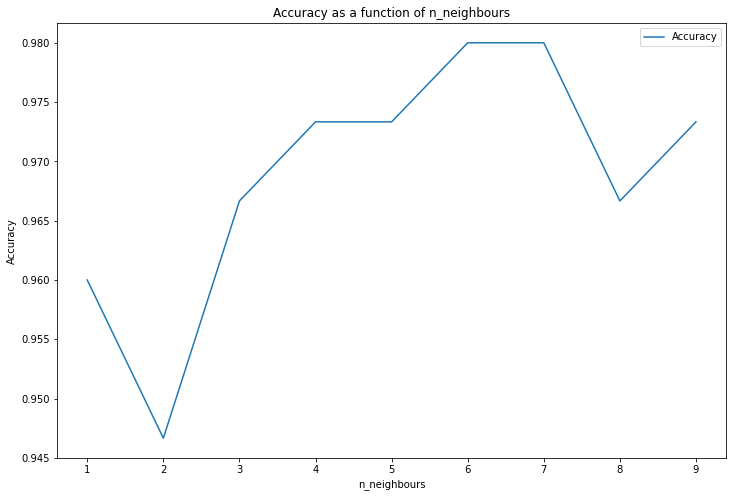

3. Design an SVM classifier for this dataset, and comment on the results.
  For an upper bound with the same split of the dataset as kNN. The model performed exceptionally well on the test data.
  The accuracy of the model is 1.0, which mean that all predictions on the test data were correct.
  * Precision: Value of 1.0. High precision means low FP
  * Recall: Correctly predicted positive observations to all observations in actual class. Value was 1.0
  * F1 score: The weighted avg of precision and Recall. 1.0

  What was really interesting to see is that when I took 6% of the training data. We still achieved an accuracy of 97%
  an other metrics were:
  * Precision = 1.0 for class 0, 1.0 for Class 1, 0.92 for class 2 which is good!
  * Recall: Class 0 = 1.0, Class 1 = 0.91 and Class 2 = 1.0
  * F1 score: Class 0 = 1.0, Class 1 + 2 = 0.96

  We may be overfitting as we have a small dataset.


4. Investigate the computational times for the various classifiers, in terms of both training and classification execution times. You should find the magic function `%timeit` useful.
KNN, fit and predict times:
107 µs ± 298 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)
2.89 ms ± 56.4 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)

SVC, fit and predict times:
205 µs ± 1.38 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
62.3 µs ± 330 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)

SVC has a slightly longer fitting time compared to the kNN classifier. 
However SVC has significantly shorter prediction time compared to kNN

In [30]:
# Data handling
import pandas as pd
import numpy as np
# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns
# Data preprocessing
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
# Machine learning
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, cross_val_score
# Classifiers
from sklearn.neighbors import KNeighborsClassifier
# Metrics
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix




In [8]:
# Create a dataframe from the iris dataset
irisDS = load_iris() # irisDS is a 150x4 numpy.ndarray
irisDF = pd.DataFrame(data=irisDS.data, columns=irisDS.feature_names) # Create a dataframe from the irisDS.data

# Add the target column to the dataframe
irisDF['target'] = irisDS.target

# Add the target names to the dataframe
irisDF['target_names'] = irisDF['target'].map(lambda x: irisDS.target_names[x])
irisDF.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_names
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [9]:
# Let's see the tail
irisDF.tail()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_names
145,6.7,3.0,5.2,2.3,2,virginica
146,6.3,2.5,5.0,1.9,2,virginica
147,6.5,3.0,5.2,2.0,2,virginica
148,6.2,3.4,5.4,2.3,2,virginica
149,5.9,3.0,5.1,1.8,2,virginica


# Preprocessing 

In [10]:
irisDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int64  
 5   target_names       150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
sepal length (cm),150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
sepal width (cm),150.0,3.057333,0.435866,2.0,2.8,3.00,3.3,4.4
petal length (cm),150.0,3.758000,1.765298,1.0,1.6,4.35,5.1,6.9
petal width (cm),150.0,1.199333,0.762238,0.1,0.3,1.30,1.8,2.5
target,150.0,1.000000,0.819232,0.0,0.0,1.00,2.0,2.0


In [13]:
# Let''s see unique values of the target column
irisDF['target_names'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [14]:
irisDF['target_names'].value_counts()

versicolor    50
setosa        50
virginica     50
Name: target_names, dtype: int64

<AxesSubplot:>

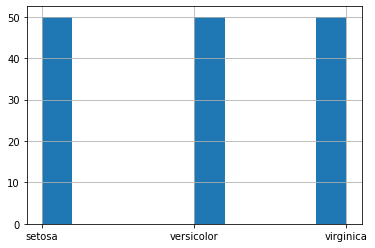

In [18]:
irisDF['target_names'].hist()

In [19]:
# Check for missing values
irisDF.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
target_names         0
dtype: int64

In [20]:
Setosa = irisDF[irisDF['target_names'] == 'setosa'] # Get the setosa rows
Versicolor = irisDF[irisDF['target_names'] == 'versicolor'] # Get the versicolor rows
Virginica = irisDF[irisDF['target_names'] == 'virginica'] # Get the virginica rows

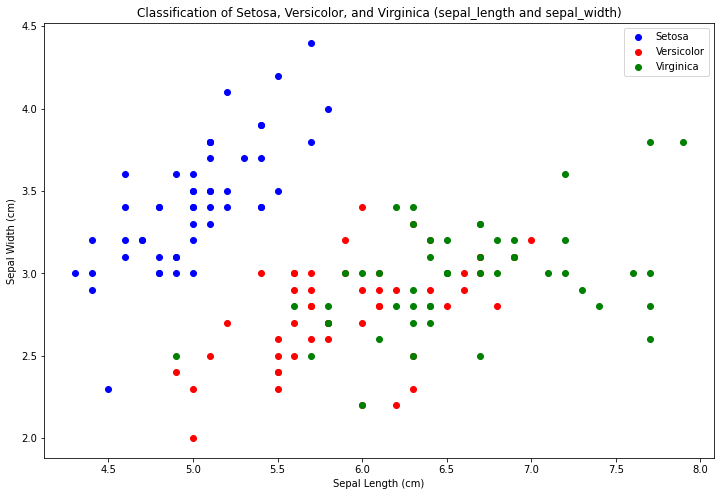

In [23]:
# Scatter Plot
fig, ax = plt.subplots(figsize=(12, 8)) # Create a figure and a set of subplots
ax.scatter(Setosa['sepal length (cm)'], Setosa['sepal width (cm)'], c="b", marker="o", label="Setosa") # Create a scatter plot of setosa
ax.scatter(Versicolor['sepal length (cm)'], Versicolor['sepal width (cm)'], c="r", marker="o", label="Versicolor") # Create a scatter plot of versicolor
ax.scatter(Virginica['sepal length (cm)'], Virginica['sepal width (cm)'], c="g", marker="o", label="Virginica") # Create a scatter plot of virginica
ax.set_xlabel("Sepal Length (cm)") # Set the x-axis label
ax.set_ylabel("Sepal Width (cm)") # Set the y-axis label
ax.set_title("Classification of Setosa, Versicolor, and Virginica (sepal_length and sepal_width)") # Set the title of the plot
ax.legend() # Place a legend on the axes

1. Setosa flowers have relatively smaller sepal length and width compared to other two
2. Versicolor flowers have moderate sepal length and width
3. Virginica flowers have a larger sepal length and width compared to the other two types

## EXAM POTENTIAL 
This would be a good place to perform K Means clustering but I will not do that
As it does not pertain the assignment

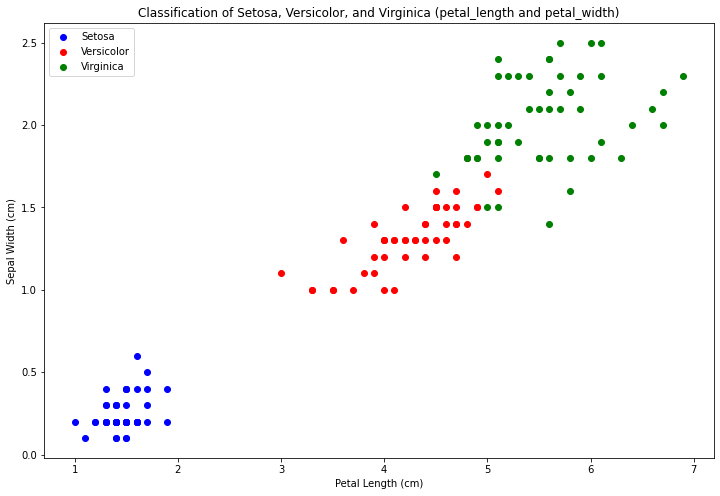

In [24]:
# Scatter Plot
fig, ax = plt.subplots(figsize=(12, 8)) # Create a figure and a set of subplots
ax.scatter(Setosa['petal length (cm)'], Setosa['petal width (cm)'], c="b", marker="o", label="Setosa") # Create a scatter plot of setosa
ax.scatter(Versicolor['petal length (cm)'], Versicolor['petal width (cm)'], c="r", marker="o", label="Versicolor") # Create a scatter plot of versicolor
ax.scatter(Virginica['petal length (cm)'], Virginica['petal width (cm)'], c="g", marker="o", label="Virginica") # Create a scatter plot of virginica
ax.set_xlabel("Petal Length (cm)") # Set the x-axis label
ax.set_ylabel("Sepal Width (cm)") # Set the y-axis label
ax.set_title("Classification of Setosa, Versicolor, and Virginica (petal_length and petal_width)") # Set the title of the plot
ax.legend() # Place a legend on the axes

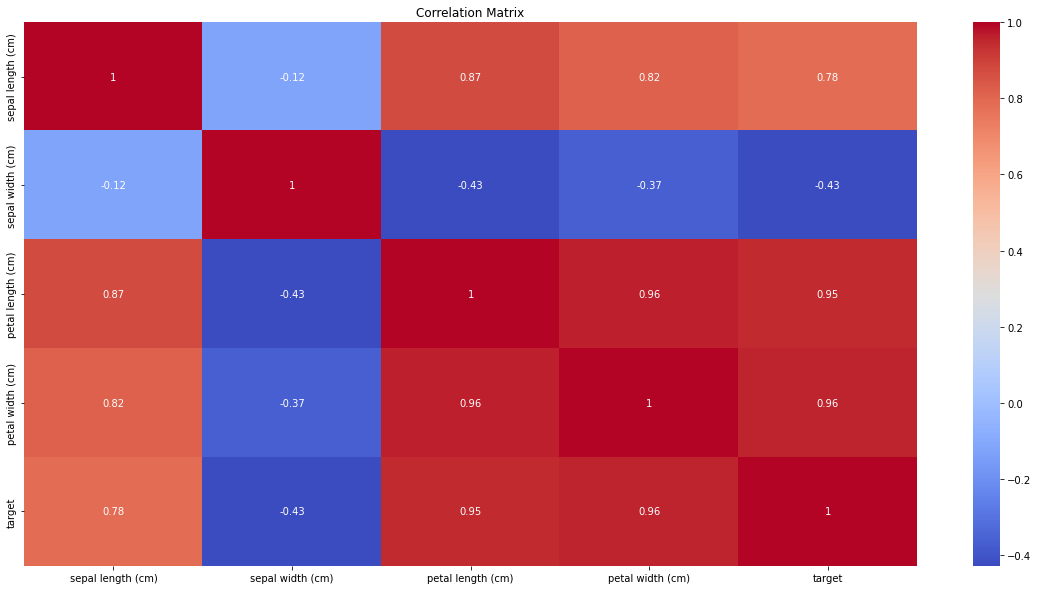

In [25]:
# Let's plot a correlation matrix to see the relationship between the features
# Correlation matrix
corr = irisDF.corr()
plt.figure(figsize=(20,10)) # Create a new figure
sns.heatmap(corr, annot=True, cmap="coolwarm") # Create a heatmap of the correlation matrix
plt.title("Correlation Matrix") # Set the title of the plot
plt.show() # Show the plot


# Running n = 1 to 50 for accuracy only

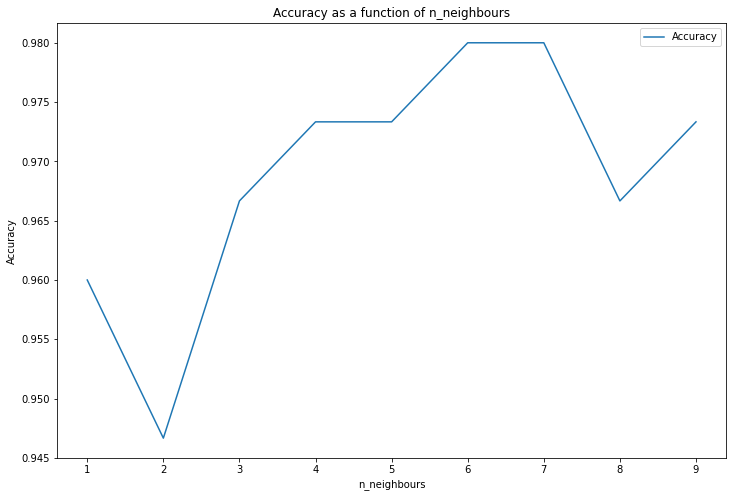

In [32]:
accuracies = []
# neighbors = np.arange(1, 50) # Create an array of numbers from 1 to 50
neighbors = range(1, 10) # Create an array of numbers from 1 to 50
for k in neighbors:
    classifier = KNeighborsClassifier(n_neighbors=k) # Create a KNeighborsClassifier with k neighbors
    scores = cross_val_score(classifier, irisDS.data, irisDS.target, scoring="accuracy", cv=5) # Get the cross_val_score of the classifier
    accuracies.append(scores.mean()) # Append the mean of the scores to the accuracies list

# Plot the accuracy as a function of n_neighbours
plt.figure(figsize=(12, 8)) # Create a new figure
plt.plot(neighbors, accuracies, label="Accuracy") # Plot the accuracies
plt.title("Accuracy as a function of n_neighbours") # Set the title of the plot
plt.xlabel("n_neighbours") # Set the x-axis label
plt.ylabel("Accuracy") # Set the y-axis label
plt.legend() # Place a legend on the axes

# Optimal Value for n = 3

Accuracy: 1.0


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


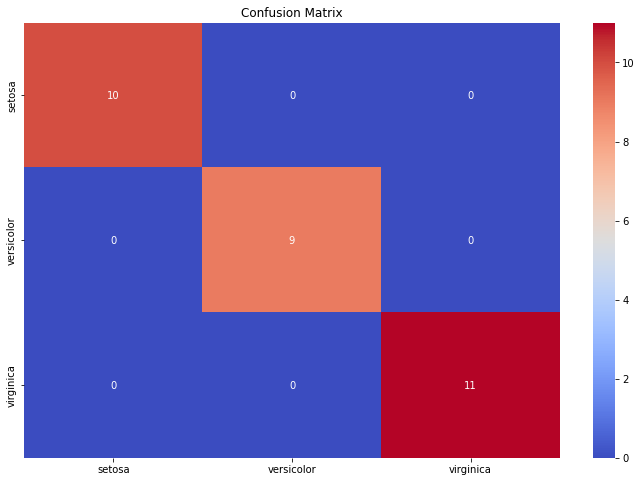

In [34]:
X = irisDS.data # Features
Y = irisDS.target # Target variable

# Split the dataset into the training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42) # Split the dataset into the training set and test set
knn_n3 = KNeighborsClassifier(n_neighbors=6) # Create KNN classifier
knn_n3.fit(X_train, y_train) # Fit the classifier to the data
y_pred_n3 = knn_n3.predict(X_test) # Make predictions on the test data

# Model Accuracy, how often is the classifier correct?
print("Accuracy:", accuracy_score(y_test, y_pred_n3)) # Print the accuracy score
print("\n") # Print a new line
print("Classification Report:") # Print the classification report
print(classification_report(y_test, y_pred_n3)) # Print the classification report
print("\n") # Print a new line
print("Confusion Matrix:") # Print the confusion matrix
print(confusion_matrix(y_test, y_pred_n3)) # Print the confusion matrix
# Make a more readable confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_n3) # Get the confusion matrix
conf_matrix = pd.DataFrame(conf_matrix, columns=irisDS.target_names, index=irisDS.target_names) # Create a dataframe from the confusion matrix
plt.figure(figsize=(12, 8)) # Create a new figure
sns.heatmap(conf_matrix, annot=True, cmap="coolwarm") # Create a heatmap of the confusion matrix
plt.title("Confusion Matrix") # Set the title of the plot
plt.show() # Show the plot


random_state=42 is used for initializing the internal random number generator, which will decide the splitting of data into train and test indices. Setting random_state to an integer will make the output deterministic, meaning that the split will always be the same every time the script is run.

# SVM classifier

Accuracy: 1.0


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


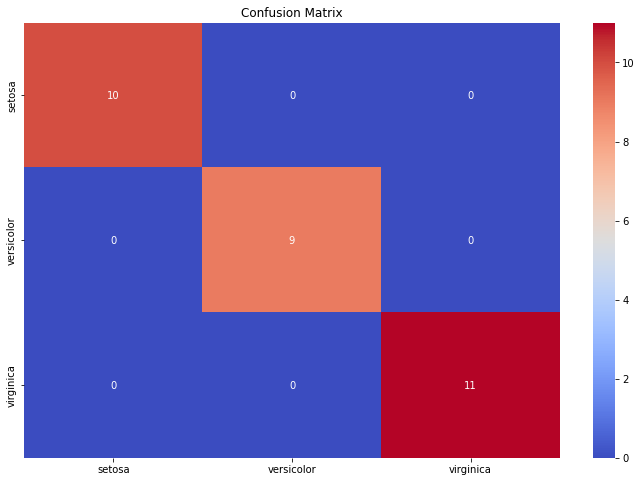

In [36]:
# Design SVM classifier for the iris dataset, and comment on the performance of the classifier
from sklearn.svm import SVC # Import the Support Vector Classifier
# Create a Support Vector Classifier
svc = SVC(kernel="linear", C=1)
# Fit the classifier to the data
svc.fit(X_train, y_train)
# Make predictions on the test data
y_pred_svc = svc.predict(X_test)
# Model Accuracy, how often is the classifier correct?
print("Accuracy:", accuracy_score(y_test, y_pred_svc)) # Print the accuracy score
print("\n") # Print a new line
print("Classification Report:") # Print the classification report
print(classification_report(y_test, y_pred_svc)) # Print the classification report
print("\n") # Print a new line
print("Confusion Matrix:") # Print the confusion matrix
print(confusion_matrix(y_test, y_pred_svc)) # Print the confusion matrix
# Make a more readable confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_svc) # Get the confusion matrix
conf_matrix = pd.DataFrame(conf_matrix, columns=irisDS.target_names, index=irisDS.target_names) # Create a dataframe from the confusion matrix
plt.figure(figsize=(12, 8)) # Create a new figure
sns.heatmap(conf_matrix, annot=True, cmap="coolwarm") # Create a heatmap of the confusion matrix
plt.title("Confusion Matrix") # Set the title of the plot
plt.show() # Show the plot


Accuracy: 0.9716312056737588


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        48
           1       1.00      0.91      0.96        47
           2       0.92      1.00      0.96        46

    accuracy                           0.97       141
   macro avg       0.97      0.97      0.97       141
weighted avg       0.97      0.97      0.97       141



Confusion Matrix:
[[48  0  0]
 [ 0 43  4]
 [ 0  0 46]]


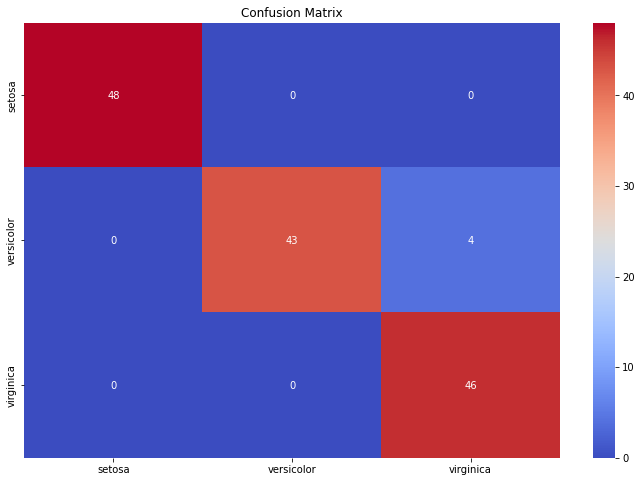

In [37]:
# The above code performed extremely well 
# let's try to use  6% of the data for training and 94% for testing
# this might give us a better lower bound on the performance of the classifier
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.94, random_state=42) # Split the dataset into the training set and test set
# Create a Support Vector Classifier
svc = SVC(kernel="linear", C=1)
# Fit the classifier to the data
svc.fit(X_train, y_train)
# Make predictions on the test data
y_pred_svc = svc.predict(X_test)
# Model Accuracy, how often is the classifier correct?
print("Accuracy:", accuracy_score(y_test, y_pred_svc)) # Print the accuracy score
print("\n") # Print a new line
print("Classification Report:") # Print the classification report
print(classification_report(y_test, y_pred_svc)) # Print the classification report
print("\n") # Print a new line
print("Confusion Matrix:") # Print the confusion matrix
print(confusion_matrix(y_test, y_pred_svc)) # Print the confusion matrix
# Make a more readable confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_svc) # Get the confusion matrix
conf_matrix = pd.DataFrame(conf_matrix, columns=irisDS.target_names, index=irisDS.target_names) # Create a dataframe from the confusion matrix
plt.figure(figsize=(12, 8)) # Create a new figure
sns.heatmap(conf_matrix, annot=True, cmap="coolwarm") # Create a heatmap of the confusion matrix
plt.title("Confusion Matrix") # Set the title of the plot
plt.show() # Show the plot


In [40]:
# Computational times of the classifiers using %timeit
# KNN
print("KNN, fit and predict times:")
%timeit knn_n3.fit(X_train, y_train)
%timeit knn_n3.predict(X_test)
print()
# SVC
print("SVC, fit and predict times:")
%timeit svc.fit(X_train, y_train)

%timeit svc.predict(X_test)



KNN, fit and predict times:
107 µs ± 298 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)
2.89 ms ± 56.4 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)

SVC, fit and predict times:
205 µs ± 1.38 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
62.3 µs ± 330 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)
